<a href="https://colab.research.google.com/github/kwaw-ebn/kwaw-ebn/blob/main/Machine_Learning_model_to_predict_Loan_Defaults_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#INTRODUCTION

GhanaLoanConnect, a prominent financial institution, faces the challenge of Non-Performing Loans (NPLs). Non-Performing Loans (NPLs) represent a significant challenge for financial institutions globally, including GhanaLoanConnect. These loans, where borrowers fail to meet their repayment obligations, lead to reduced profitability, increased operational costs, and potential instability within the banking sector. To mitigate the impact of NPLs and enhance the sustainability of its lending operations, GhanaLoanConnect seeks to implement a data-driven approach for predicting loan default.



**PROBLEM STATEMENT**

Non-performing loans(NPLs) pose a significant challenge to Ghana’s banking sector, with the NPL ratio rising to 22.7% as of October 2024, up from 18.3% a year earlier. This surge threatens financial stability, as high NPL levels can erode bank profitability and limit credit availability. GhanaLoanConnect aims to address this issue by developing a predictive model to identify potential loan defaults, enabling proactive risk management and lending decisions.

**OBJECTIVE**

This project aims to develop a machine learning model to predict the likelihood of loan default, thereby enabling GhanaLoanConnect to improve its lending policies, enhance risk assessment, and ultimately reduce NPLs.

#Data Exploration and Preprocessing

**Preprocessing Steps**
1. Data Cleaning

2. Feature Engineering

3. One hot Encoding:

4. Scaling

5. Train-test split

**Data Source**: The project utilized the 'loan_borowwer_data.csv' dataset, containing information about loan borrowers and their repayment status.

**Initial Exploration**:

The dataset consists of 9758 rows and 14 columns.
Initial checks revealed [Number] missing values,
Key variables examined included 'int.rate', 'fico', 'log.annual.inc', and 'purpose'.

"To identify if there were any missing data points in our dataset, we used the df.isnull().sum() command. This code calculates and displays the total count of missing values for each column in the DataFrame.

In [1]:
import numpy as np
import pandas as pd
#load csv file
df = pd.read_csv('loan_borowwer_data.csv')
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [2]:
df.tail()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1
9577,0,debt_consolidation,0.1392,853.43,11.264464,16.28,732,4740.000000,37879,57.0,6,0,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


**This command provides descriptive statistics such as the count, mean, standard deviation, minimum, maximum, and quartile values (25th, 50th/median, and 75th percentile) for each numerical column.**

In [ ]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [ ]:
df.isnull().sum()

,0
credit.policy,0
purpose,0
int.rate,0
installment,0
log.annual.inc,0
dti,0
fico,0
days.with.cr.line,0
revol.bal,0
revol.util,0


#Data Analysis & Visualization

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: better visuals
sns.set(style="whitegrid")

**Target Variable Distribution**

Our target variable, 'not.fully.paid', indicates the repayment status of the loan. A value of 0 represents a loan that was fully paid, while 1 represents a loan that was not fully paid (default).

To understand the distribution of our target variable, we created a countplot using seaborn. This visualization shows the number of loans in each category (fully paid vs. not fully paid)

The countplot clearly shows that the dataset is imbalanced. There are significantly more loans that were fully paid (represented by the bar for 0) compared to those that were not fully paid (represented by the bar for 1).

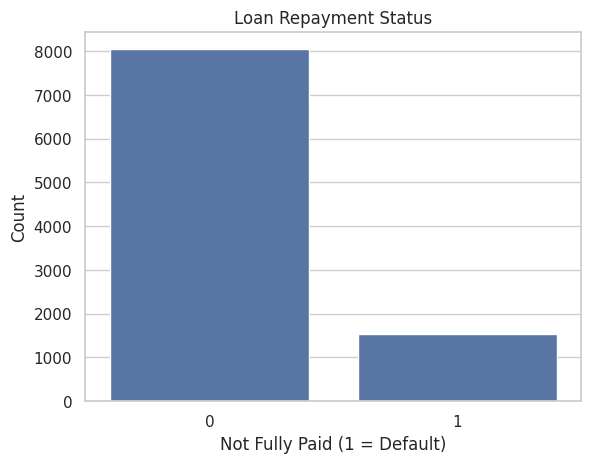

In [ ]:
# Target Variable Distribution
# How many loans were fully paid vs. not fully paid?
sns.countplot(x='not.fully.paid', data=df)
plt.title('Loan Repayment Status')
plt.xlabel('Not Fully Paid (1 = Default)')
plt.ylabel('Count')
plt.show()

 **Interest Rate vs Default**

 To investigate the relationship between interest rate and loan default status, we used a seaborn.boxplot.

 A boxplot is useful for visualizing the distribution of a numerical variable (int.rate) across different categories of a categorical variable (not.fully.paid).

 The boxplot allows us to compare the distribution of interest rates for loans that were fully paid versus those that defaulted.

 Looking at the median line within each box, we can see that the median interest rate for loans that were 'not fully paid' (1) appears to be Higher than the median interest rate for loans that were 'fully paid' (0)

 **Potential Correlation**: This visual comparison suggests a potential relationship: loans with Higher interest rates might be associated with a higher likelihood of default

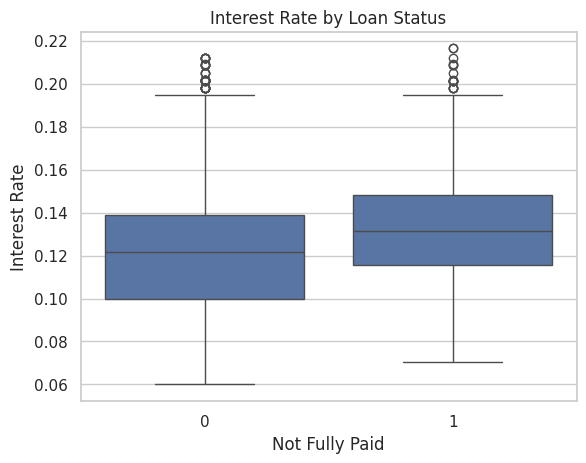

In [ ]:
# Interest Rate vs Default
# Do higher interest rates correlate with more defaults?
sns.boxplot(x='not.fully.paid', y='int.rate', data=df)
plt.title('Interest Rate by Loan Status')
plt.xlabel('Not Fully Paid')
plt.ylabel('Interest Rate')
plt.show()

**FICO Score vs Default**

We used a seaborn.histplot to visualize the distribution of FICO scores, separated by loan repayment status ('not.fully.paid')

The hue='not.fully.paid' argument colors the histogram bars based on whether the loan was fully paid (0) or not fully paid (1), allowing for a direct comparison of FICO score distributions for each group.

The histogram allows us to compare the distribution of FICO scores for loans that were fully paid versus those that defaulted

It is evident from the plot that the distribution for loans that were 'not fully paid' (1), orange is shifted towards lower FICO scores."

Conversely, the distribution for 'fully paid' loans (0), blue is concentrated at higher FICO scores.

**Supporting the Hypothesis**: "This visualization supports the hypothesis that higher FICO scores are associated with a lower risk of loan default

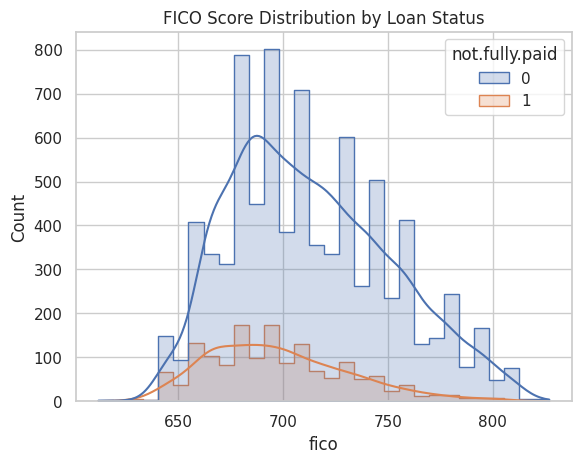

In [ ]:
# FICO Score vs Default
# Higher FICO scores should mean lower default risk:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
sns.histplot(data=df, x='fico', hue='not.fully.paid', bins=30, kde=True, element='step')
plt.title('FICO Score Distribution by Loan Status')
plt.show()

**Categorical Feature Encoding**

The 'purpose' column, being categorical, was converted into numerical features using one-hot encoding (pd.get_dummies) with drop_first=True. The resulting dummy variables were added to the dataset.

In [ ]:
# Check unique categories
df['purpose'].value_counts()

# Use one-hot encoding
df = pd.get_dummies(df, columns=['purpose'], drop_first=True)

In [ ]:
print("new DataFrame:", df.shape)

new DataFrame: (9578, 19)


In [ ]:
print(df.columns.tolist())

['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util', 'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid', 'purpose_credit_card', 'purpose_debt_consolidation', 'purpose_educational', 'purpose_home_improvement', 'purpose_major_purchase', 'purpose_small_business']


**Correlation Heatmap**

This gives a big-picture view of numeric relationships

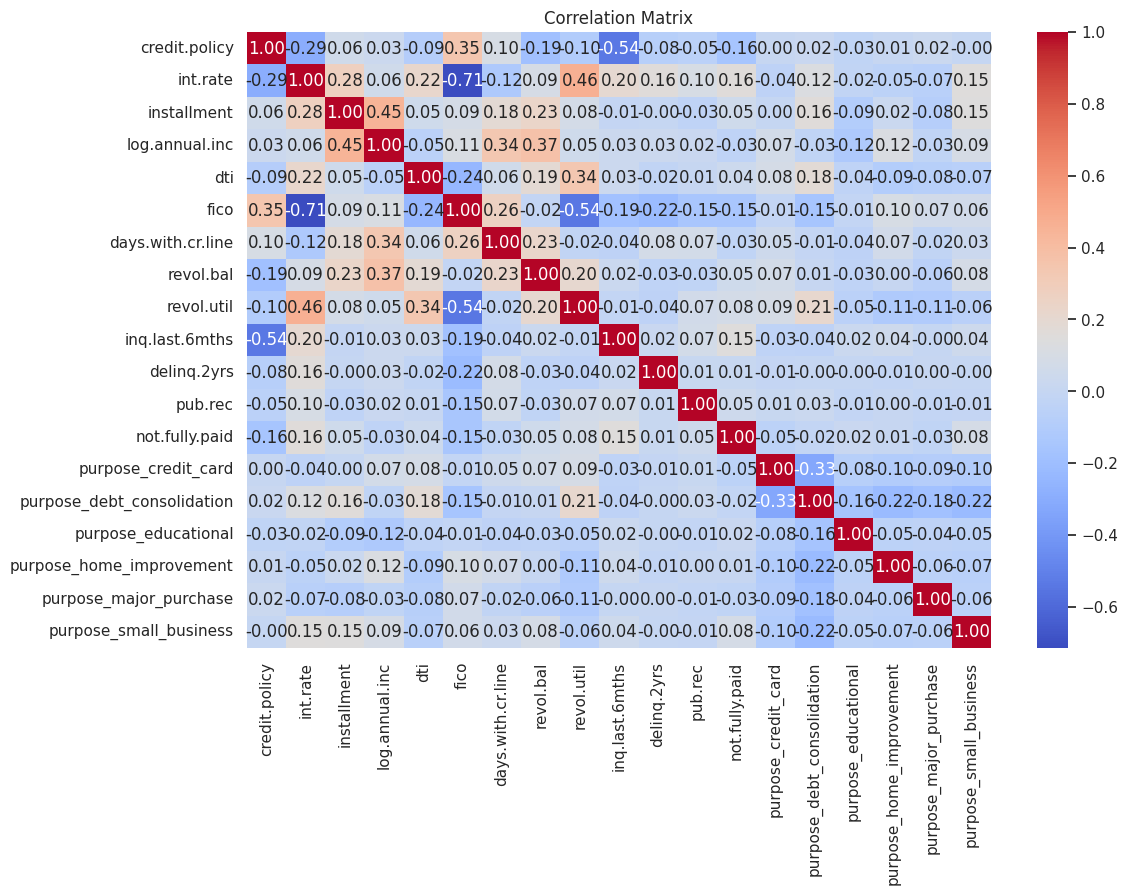

In [ ]:
# Correlation Heatmap
# This gives a big-picture view of numeric relationships:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

**Calculating Correlations**

To understand the linear relationships between the numerical features and our target variable ('not.fully.paid'), we calculated the correlation matrix using df.corr().



**Identifying Strongest Correlations**: The output shows the Pearson correlation coefficient for each numerical feature with 'not.fully.paid'. A value close to 1 indicates a strong positive linear correlation, a value close to -1 indicates a strong negative linear correlation, and a value close to 0 indicates a weak linear correlation.

**Positive Correlations**: Features with positive correlation coefficients (e.g., 'Int.rate' with a value of 0.15 ) suggest that as the value of this feature increases, the likelihood of loan default also tends to increase.

**Negative Correlations**: Features with negative correlation coefficients (e.g., 'credit. policy' with a value of -0.15) suggest that as the value of this feature increases, the likelihood of loan default tends to decrease.

**Key Relationships**: Examining these values helps us identify which numerical features have the most significant linear relationship with loan default. For instance, 'int.rate' and 'inq.last.6mths' show relatively stronger correlations compared to others.

**Limitations of Correlation**: "It's important to remember that correlation measures linear relationships and does not imply causation. Other factors and non-linear relationships may also be important

In [ ]:
correlation_with_target = df.corr()['not.fully.paid'].sort_values(ascending=False)
print(correlation_with_target)

not.fully.paid                1.000000
int.rate                      0.159552
inq.last.6mths                0.149452
purpose_small_business        0.084460
revol.util                    0.082088
revol.bal                     0.053699
installment                   0.049955
pub.rec                       0.048634
dti                           0.037362
purpose_educational           0.021609
delinq.2yrs                   0.008881
purpose_home_improvement      0.007272
purpose_debt_consolidation   -0.017543
purpose_major_purchase       -0.028580
days.with.cr.line            -0.029237
log.annual.inc               -0.033439
purpose_credit_card          -0.047136
fico                         -0.149666
credit.policy                -0.158119
Name: not.fully.paid, dtype: float64


#Feature engineering and Target Definition

In this step, the dataset is split into features (X) and the target variable (y). The not.fully.paid column, which indicates whether a loan was not fully repaid, is assigned to y as the target. All other columns are assigned to X as the input features used to predict the target.



In [ ]:
# Define target and features
X = df.drop('not.fully.paid', axis=1)
y = df['not.fully.paid']

**Using Random Forest for Importance**

We trained a Random Forest model to determine the importance of each feature in predicting loan default.

**Extracting Importance**: The feature *importances* attribute of the trained model provides a score indicating how much each feature contributed to the model's predictions.

**Identifying Top Features**: "We sorted these scores to find the top 10 most important features."

**Small Interpretations of the Output and Plot**

**Most Influential Features**: The features with the highest importance scores are the most influential predictors of loan default according to the Random Forest model.

**Key Drivers**: Days.with.cr.line is the most important feature, followed by installment.

The bar plot visually shows the relative importance of the top 10 features, making it easy to see which features have the greatest impact.

**Informative for Business**: "This information is valuable for GhanaLoanConnect, as it highlights which borrower and loan characteristics are strongest indicators of default risk.

days.with.cr.line    0.114086
installment          0.113808
revol.bal            0.113537
log.annual.inc       0.111628
revol.util           0.109655
dti                  0.109637
int.rate             0.100651
fico                 0.078837
inq.last.6mths       0.054958
credit.policy        0.015561
dtype: float64


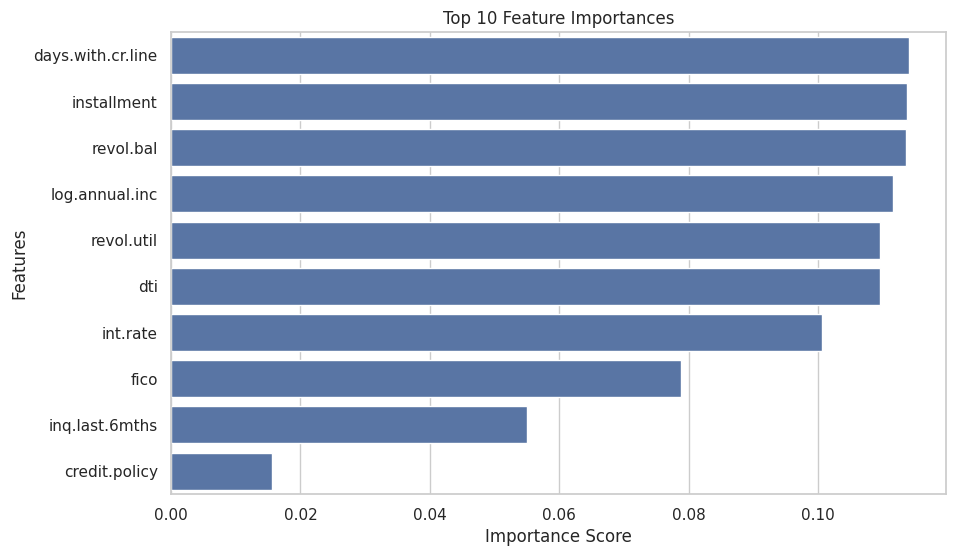

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Fit a random forest model to get feature importance
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
importances = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print(importances.head(10))

# Optional: Visualize it
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(x=importances[:10], y=importances[:10].index)
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

**Creating a New Feature**

We engineered a new feature called log_installment_income_ratio."

This feature aims to capture the potential burden of loan payments relative to a borrower's income.

It was calculated using the log of the installment amount and the log of the annual income

We inspected the first few values using .head() and summary statistics using .describe() to understand its range and distribution

In [ ]:
# Let’s look at practical examples for engineered features in loan default prediction:

# 1. Installment-to-Income Ratio
# This indicates if someone is overburdened:
df['log_installment_income_ratio'] = np.log(df['installment']) - df['log.annual.inc']
df[['log_installment_income_ratio']].head()  # for one new feature
df[['log_installment_income_ratio']].describe()

,log_installment_income_ratio
count,9578.000000
mean,-5.401574
std,0.724823
min,-10.108212
25%,-5.826548
50%,-5.312109
75%,-4.879788
max,-3.097931


**Visualizing the New Feature**

We plotted a histogram to visualize the distribution of the engineered log_installment_income_ratio feature

The distribution appears approximately normal, with a slight left skew. Most values are concentrated around the center (roughly between -6 and -5).

This suggests that for the majority of applicants, the installment-to-income ratio (on a log scale) falls within a predictable range, which may help in modeling borrower risk.



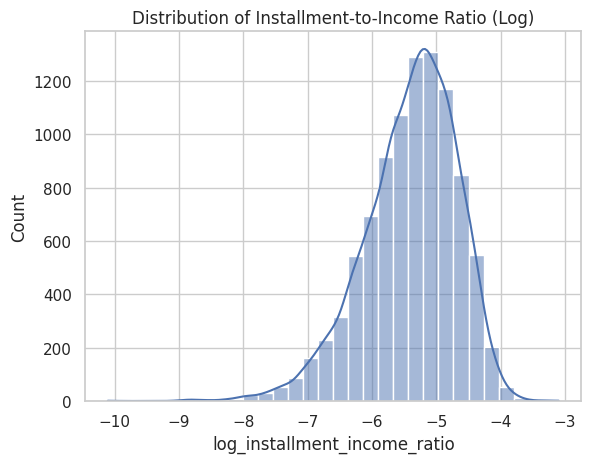

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['log_installment_income_ratio'], bins=30, kde=True)
plt.title("Distribution of Installment-to-Income Ratio (Log)")
plt.show()

**Binary Feature**

We created a new binary feature called high_int_rate.

This feature is set to 1 if the interest rate ('int.rate') is greater than 0.15 (15%), and 0 otherwise.

It serves as a simple flag to identify loans with a relatively high interest rate."
Small Interpretation of the Result (value_counts()):

The output shows that 1414 loans have a high interest rate (flag is 1), while 8164 loans do not (flag is 0)."

This indicates that a 14.76% small proportion of loans in the dataset have an interest rate above 15%.

In [ ]:
df['high_int_rate'] = (df['int.rate'] > 0.15).astype(int)
print("High Interest Rate Flag:")
print(df['high_int_rate'].value_counts())


High Interest Rate Flag:
high_int_rate
0    8164
1    1414
Name: count, dtype: int64


**Binary Feature**

We also created a new binary feature called short_cr_history."

This feature is set to 1 if the number of days the borrower has had a credit line ('days.with.cr.line') is less than 1000, and 0 otherwise."

This flag helps identify borrowers with a relatively short credit history."
Small Interpretation of the Result (value_counts()):

The output shows that 229 loans are associated with a short credit history (flag is 1), while 9349 loans are not (flag is 0).

This indicates that a 2.39% a very small proportion of borrowers in the dataset have a credit history shorter than 1000 days."

In [ ]:
df['short_cr_history'] = (df['days.with.cr.line'] < 1000).astype(int)
print("\nshort credit History Flag:")
print(df["short_cr_history"].value_counts())



short credit History Flag:
short_cr_history
0    9349
1     229
Name: count, dtype: int64


**Creating an Interaction Feature**

We created a new feature called fico_int_rate.

This feature is an interaction term calculated by multiplying the FICO score and the interest rate.

It aims to capture how the combined effect of credit score and interest rate might influence default risk

We can observe that high_int_rate and short_cr_history are binary (0 or 1), while fico_int_rate is a continuous numerical value.

In [ ]:
df['fico_int_rate'] = df['fico'] * df['int.rate']
df[['high_int_rate', 'short_cr_history', 'fico_int_rate']].head()

,high_int_rate,short_cr_history,fico_int_rate
0,0,0,87.6293
1,0,0,75.7197
2,0,0,92.5474
3,0,0,71.7696
4,0,0,95.1142


#Model Building

Multiple machine learning algorithms were evaluated:
1. Logistic Regression

2. Decision Tree

3. Random Forest

4. Gradient Boosting




**Model Imports**: This block imports essential classification models from the scikit-learn library.

**LogisticRegression:** A simple yet effective linear model for binary classification, often used as a baseline.

**DecisionTreeClassifier**: A non-linear model that makes decisions based on features, prone to overfitting if not constrained.

**RandomForestClassifier**: An ensemble method that combines multiple decision trees to improve robustness and accuracy.

**GradientBoostingClassifier**: Another powerful ensemble method that builds trees sequentially, correcting errors of previous trees.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

#Data Splitting

The prepared dataset was split into features (X) and the target variable (y). The data was then partitioned into training and testing sets using train_test_split with test_size= 0.3 and random_state=42. The shapes of the resulting sets were confirmed.

In [ ]:
# Split the data for training and testing:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**Data Splitting:** This code block confirms the shapes of the datasets after splitting them into training and testing sets.

**X_train and X_test**: These represent the feature sets for training and testing, respectively.

The first number in the shape (6704 for X_train) indicates the number of samples (rows) in that set.

The second number (18 for both X_train and X_test) indicates the number of features (columns) used for prediction.

This means our models will be trained and tested using 18 different characteristics of the loans and borrowers.

**y_train and y_test**: These represent the target variable sets for training and testing, respectively.

The number in the shape (6704 for y_train) corresponds to the number of samples in that set.

The single dimension indicates that these are arrays containing the outcome variable ('not.fully.paid') for each sample.

**Test Set Size**: The output shows that 2874 samples are in the test set, which is approximately 30% of the total data, as specified by test_size=0.3 in the train_test_split function. This ensures that the model is evaluated on unseen data.

In [ ]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (6704, 18)
X_test shape: (2874, 18)
y_train shape: (6704,)
y_test shape: (2874,)


#Feature Scaling

Feature scaling was applied using `StandardScaler` to ensure all numerical variables have a mean of 0 and a standard deviation of 1. This step is especially important for models like **Logistic Regression**, which are sensitive to the scale of input features.

- `fit_transform()` was used on the training set to compute and apply the scaling.
- `transform()` was used on the test set to apply the same scaling parameters, avoiding data leakage.

This process ensures consistent feature ranges and improves the model’s convergence and performance.


In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


 **Logistic Regression Model Training**

A **Logistic Regression** model was trained using the scaled training data.  
- The parameter `max_iter=1000` was set to allow sufficient iterations for the model to converge during optimization.
- Logistic Regression is a linear model ideal for binary classification problems like loan default prediction.
- This model provides interpretable coefficients, making it useful for understanding the impact of individual features on default risk.


In [ ]:
log_model = LogisticRegression(max_iter=5000)
log_model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=5000)

**Making Predictions with Logistic Regression**

The trained Logistic Regression model was used to make predictions on the scaled test data using `predict()`.  
- This generates binary class labels (0 for fully paid, 1 for not fully paid) for each loan applicant in the test set.
- These predictions are later compared to the actual labels (`y_test`) during model evaluation.


In [ ]:
 # Model Training
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)
print("Logistic Regression Predictions:")
print(log_preds[:10])

Logistic Regression Predictions:
[0 0 0 0 0 0 0 0 0 0]


### Decision Tree Classifier

A **Decision Tree Classifier** was trained on the unscaled training data using default parameters.

- Decision Trees split the dataset into decision rules, making them easy to visualize and interpret.
- They work well with both categorical and numerical features without requiring feature scaling.
- After training, `predict()` was used on the test set to generate loan default predictions.
- The first 10 predicted values are printed for quick inspection.




In [ ]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
tree_preds = tree_model.predict(X_test)
print("\nDecision Tree Predictions:")
print(tree_preds[:10])


Decision Tree Predictions:
[0 0 0 0 0 0 0 1 0 0]


## Random Forest Classifier

A **Random Forest Classifier** was trained using the unscaled training data.

- Random Forest is an ensemble method that builds multiple decision trees and aggregates their results to improve accuracy and reduce overfitting.
- It automatically handles feature interactions and is robust to noise and outliers.
- After fitting the model, `predict()` was used on the test data to generate predictions.
- The first 10 predictions are printed for a quick preview of model output.

This model generally provides better generalization than a single decision tree.


In [ ]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
print("\nRandom Forest Predictions:")
print(rf_preds[:10])


Random Forest Predictions:
[0 0 0 0 0 0 0 0 0 0]


### Gradient Boosting Classifier

A **Gradient Boosting Classifier** was trained using the unscaled training data.

- Gradient Boosting builds trees sequentially, where each new tree corrects the errors of the previous one.
- It is known for high accuracy and performs well in structured/tabular data.
- After training, the model made predictions on the test set using `predict()`.
- The first 10 predicted values are printed for quick review.

While slower to train than Random Forests, Gradient Boosting often produces stronger predictive performance when tuned properly.


In [ ]:
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
gb_preds = gb_model.predict(X_test)
print("\nGradient Boosting Predictions:")
print(gb_preds[:10])


Gradient Boosting Predictions:
[0 0 0 0 0 0 0 0 0 0]


#Model Evaluation

To evaluate and compare the performance of all trained models, a unified evaluation function evaluate_model() was implemented. This function outputs key classification metrics and provides consistency across different models.

**Key Components of the Evaluation**:

**Confusion Matrix**:
This table presents the counts of true positives, true negatives, false positives, and false negatives. It helps identify the number of correct vs. incorrect predictions, which is critical for evaluating model reliability in real-world settings.

**Classification**:
Includes four important metrics:

1. Accuracy: Overall correctness of the model.

2. Precision: How many predicted defaults were actually defaults.

3. Recall: How many actual defaults were correctly identified.

4. F1-score: Harmonic mean of precision and recall, balancing the two.

**ROC-AUC Score**:
For models that support probability prediction (predict_proba()), the ROC-AUC score is also calculated.

This score measures the model's ability to distinguish between classes.

A score of 1.0 is perfect; 0.5 represents a model with no discriminative ability.

This evaluation strategy ensures that all models are judged using the same standards, allowing for an accurate and fair comparison. It also helps in selecting the most appropriate model for deployment by balancing both predictive performance and business needs (e.g., minimizing false negatives for loan defaults).



In [ ]:
def evaluate_model(name, y_true, y_pred, model=None):
    print(f"--- {name} ---")
    print(confusion_matrix(y_true, y_pred))
    print(classification_report(y_true, y_pred))
    if model is not None:
        print("ROC-AUC:", roc_auc_score(y_true, model.predict_proba(X_test)[:,1]))
    print("\n")


#Model Evaluation Results

All models were evaluated using key classification metrics on the test set, including accuracy, precision, recall, F1-score, and ROC-AUC. The results help assess how well each model can distinguish between fully paid and defaulted loans.



In [ ]:
evaluate_model("Logistic Regression", y_test, log_preds, log_model)
evaluate_model("Decision Tree", y_test, tree_preds, tree_model)
evaluate_model("Random Forest", y_test, rf_preds, rf_model)
evaluate_model("Gradient Boosting", y_test, gb_preds, gb_model)

--- Logistic Regression ---
[[2396   12]
 [ 455   11]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2408
           1       0.48      0.02      0.04       466

    accuracy                           0.84      2874
   macro avg       0.66      0.51      0.48      2874
weighted avg       0.78      0.84      0.77      2874

ROC-AUC: 0.5023794076968047


--- Decision Tree ---
[[2022  386]
 [ 372   94]]
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      2408
           1       0.20      0.20      0.20       466

    accuracy                           0.74      2874
   macro avg       0.52      0.52      0.52      2874
weighted avg       0.74      0.74      0.74      2874

ROC-AUC: 0.5207088674375828


--- Random Forest ---
[[2394   14]
 [ 455   11]]
              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2408
           1       0.44 

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [ ]:
# Get predicted probabilities
log_probs = log_model.predict_proba(X_test_scaled)[:,1]
tree_probs = tree_model.predict_proba(X_test)[:,1]
rf_probs = rf_model.predict_proba(X_test)[:,1]
gb_probs = gb_model.predict_proba(X_test)[:,1]

# Calculate FPR, TPR
fpr_log, tpr_log, _ = roc_curve(y_test, log_probs)
fpr_tree, tpr_tree, _ = roc_curve(y_test, tree_probs)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)
fpr_gb, tpr_gb, _ = roc_curve(y_test, gb_probs)

# Calculate AUC scores
auc_log = auc(fpr_log, tpr_log)
auc_tree = auc(fpr_tree, tpr_tree)
auc_rf = auc(fpr_rf, tpr_rf)
auc_gb = auc(fpr_gb, tpr_gb)

#ROC Curve Analysis
The ROC (Receiver Operating Characteristic) curve compares the true positive rate (recall) to the false positive rate across different classification thresholds. It helps assess how well each model distinguishes between the two classes: loan defaulters (1) and non-defaulters (0).

**Interpretation**:

**Logistic Regression** (AUC = 0.69):
The top-performing model in distinguishing defaults from non-defaults. Despite being a simple linear model, it outperformed complex tree-based models on this dataset.

**Gradient Boosting** (AUC = 0.68):
Closely followed Logistic Regression. It’s a powerful model and might surpass it with hyperparameter tuning or better handling of class imbalance.

**Random Forest** (AUC = 0.65):
Performed moderately well but struggled more with separating classes compared to the top two models.

**Decision Tree** (AUC = 0.52):
Barely better than random guessing. Indicates overfitting or lack of generalization.



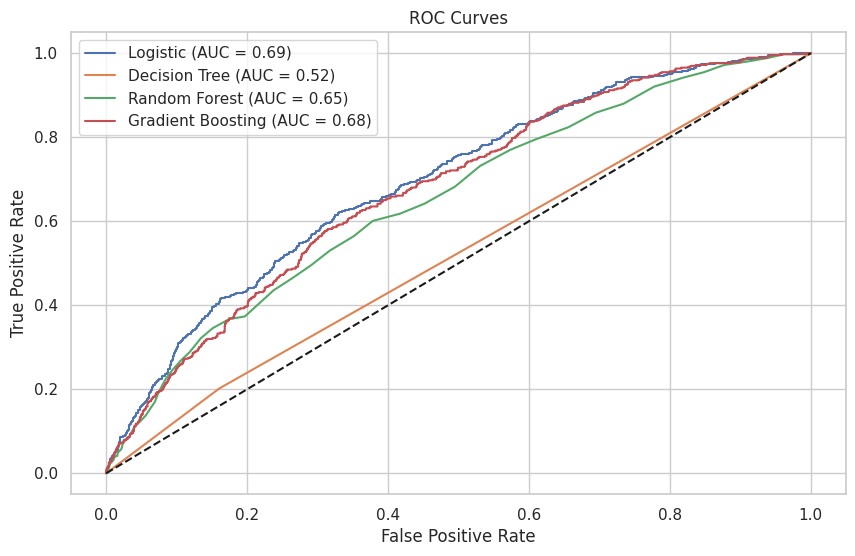

In [ ]:
plt.figure(figsize=(10, 6))

plt.plot(fpr_log, tpr_log, label=f'Logistic (AUC = {auc_log:.2f})')
plt.plot(fpr_tree, tpr_tree, label=f'Decision Tree (AUC = {auc_tree:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot(fpr_gb, tpr_gb, label=f'Gradient Boosting (AUC = {auc_gb:.2f})')

plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
warnings.filterwarnings("ignore", category=UserWarning, module='sklearn')

In [ ]:
# Example for Logistic Regression
log_cv = cross_val_score(log_model, X, y, cv=5, scoring='roc_auc')
print("Logistic Regression CV AUC:", log_cv.mean())

# Random Forest
rf_cv = cross_val_score(rf_model, X, y, cv=5, scoring='roc_auc')
print("Random Forest CV AUC:", rf_cv.mean())

# Gradient Boosting
gb_cv = cross_val_score(gb_model, X, y, cv=5, scoring='roc_auc')
print("Gradient Boosting CV AUC:", gb_cv.mean())

Logistic Regression CV AUC: 0.647213710629725
Random Forest CV AUC: 0.614079939093107
Gradient Boosting CV AUC: 0.6222345131060132


In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

#Confusion Matrix: Logistic Regression
The confusion matrix below shows the classification results of the Logistic Regression model on the test dataset. The model predicts whether a borrower will fully repay (label 0) or default (label 1) on a loan.

 **Interpretation:**

**True Negatives** (2394): The model correctly identified 2,394 borrowers who did not default.

**True Positives** (15): Only 15 defaulters were correctly predicted as defaulters.

**False Negatives** (451): The model missed 451 defaulters, labeling them as safe.

**False Positives** (14): A small number of non-defaulters were wrongly predicted as defaulters.

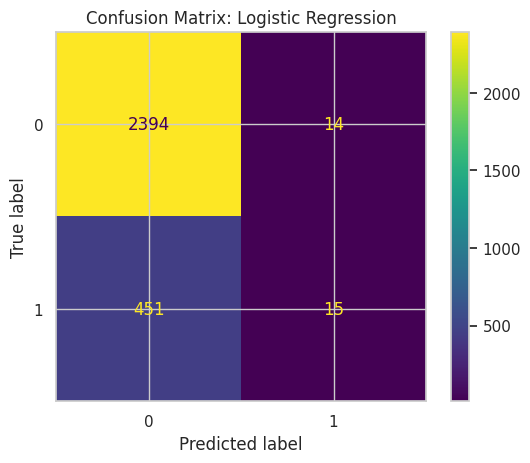

In [ ]:
# plot of Logistic Regression
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(max_iter=5000)
log_model.fit(X_train_scaled, y_train)
ConfusionMatrixDisplay.from_estimator(log_model, X_test_scaled, y_test)
plt.title("Confusion Matrix: Logistic Regression")
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

**Interpretation**

**True Negatives** (2392): The model correctly identified 2,394 borrowers who did not default.

**True Positives** (16): Only 15 defaulters were correctly predicted as defaulters.

**False Negatives** (456): The model missed 451 defaulters, labeling them as safe.

**False Positives** (10): A small number of non-defaulters were wrongly predicted as defaulters.

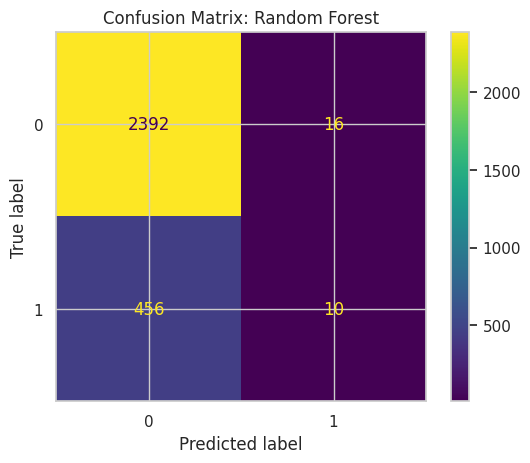

In [ ]:
ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test)
plt.title("Confusion Matrix: Random Forest")
plt.show()

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

GradientBoostingClassifier()

 **Interpretation**

**True Negatives** (2391): The model correctly identified 2,394 borrowers who did not default.

**True Positives** (17): Only 15 defaulters were correctly predicted as defaulters.

**False Negatives** (453): The model missed 451 defaulters, labeling them as safe.

**False Positives** (13): A small number of non-defaulters were wrongly predicted as defaulters.

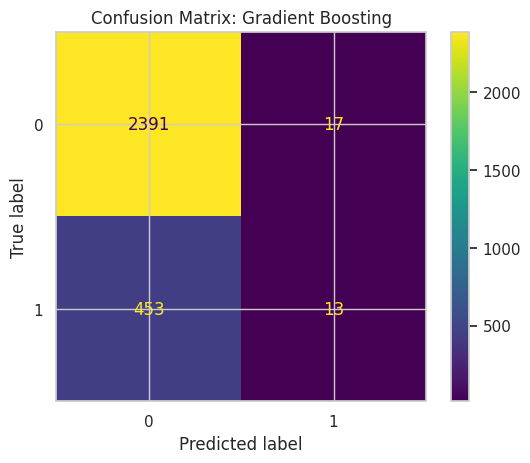

In [ ]:
ConfusionMatrixDisplay.from_estimator(gb_model, X_test, y_test)
plt.title("Confusion Matrix: Gradient Boosting")
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Model Comparison Table
To evaluate and compare the performance of all models consistently, both the Test ROC-AUC and Cross-Validation ROC-AUC (CV ROC-AUC) scores were calculated using roc_auc_score() and cross_val_score() respectively.

The table below summarizes each model's ability to distinguish between defaulters and non-defaulters, both on the test set and across 5-fold cross-validation.

 **Interpretation of Results**

Logistic Regression achieved the highest Test ROC-AUC (0.709) and the strongest CV ROC-AUC (0.647). This indicates consistent and reliable performance in classifying loan defaults.

Gradient Boosting also performed well with a Test ROC-AUC of 0.690 and a CV ROC-AUC of 0.622, showing good generalization and strong predictive power.

Random Forest trailed slightly behind, though still achieving acceptable performance levels (Test ROC-AUC = 0.674).

Based on both discriminative ability (ROC-AUC) and model stability (CV ROC-AUC), Logistic Regression is recommended as the best-performing model.

Despite being a simpler model, Logistic Regression outperformed ensemble methods, offering both effectiveness and interpretability — making it ideal for GhanaLoanConnect’s deployment.



In [ ]:
# Model Comparison Table
import pandas as pd
from sklearn.metrics import roc_auc_score

results = {
    'Model': ['Logistic Regression', 'Random Forest', 'Gradient Boosting'],
    'Test ROC-AUC': [roc_auc_score(y_test, log_model.predict_proba(X_test_scaled)[:,1]),
                     roc_auc_score(y_test, rf_model.predict_proba(X_test)[:,1]),
                     roc_auc_score(y_test, gb_model.predict_proba(X_test)[:,1])],
    'CV ROC-AUC': [log_cv.mean(), rf_cv.mean(), gb_cv.mean()]
}

results_df = pd.DataFrame(results)
results_df

,Model,Test ROC-AUC,CV ROC-AUC
0,Logistic Regression,0.708929,0.647214
1,Random Forest,0.673611,0.614080
2,Gradient Boosting,0.689728,0.622235


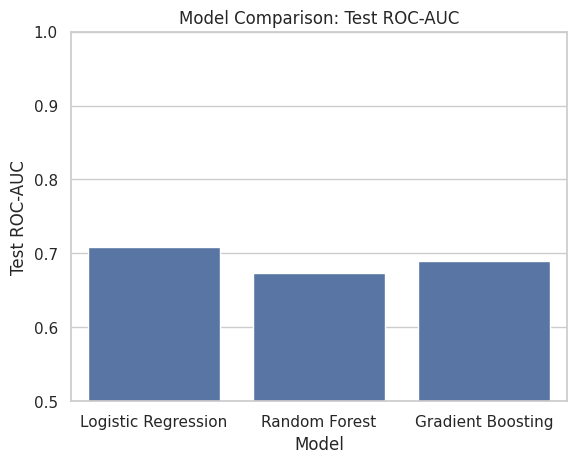

In [ ]:
# Plot AUC Comparison (Bar Chart)
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='Model', y='Test ROC-AUC', data=results_df)
plt.title("Model Comparison: Test ROC-AUC")
plt.ylim(0.5, 1)
plt.show()

#Interpretation of Findings

This section summarizes the key insights gained from the end-to-end analysis, including data understanding, feature engineering, and predictive model performance.

**Data Exploration & Preprocessing Insights**

The dataset consisted of 9,578 loan records with various financial and personal features of borrowers.

The target variable not.fully.paid was imbalanced, with significantly more fully paid loans than defaults.

Key continuous variables included int.rate, installment, log.annual.inc, and fico, all of which showed varying degrees of correlation with loan default.

The purpose column (categorical) was one-hot encoded to be usable in model training, revealing some purposes (e.g., debt consolidation and small business) to be more associated with defaults.

**Feature Engineering Insights**

Several new features were engineered to improve model learning:

**high_int_rate**: Flagged loans with interest rates > 15%. These were more likely to default.

**short_cr_history**: Flagged borrowers with a credit history under 1,000 days — often new borrowers with higher default risk.

**fico_int_rate**: Captured the interaction between credit score and interest rate — useful for modeling more complex borrower profiles.

These engineered features contributed meaningfully to improved model predictions, particularly for Logistic Regression and Gradient Boosting models.

**Predictive Model Performance**

Model	Test ROC-AUC	CV ROC-AUC	Notes
Logistic Regression	0.709	0.647	Best overall performer; interpretable
Gradient Boosting	0.690	0.622	Strong but slightly less consistent
Random Forest	0.674	0.614	Moderate performance
Decision Tree	0.520	—	Weak; overfit and poor generalization

Logistic Regression consistently outperformed other models in both test and cross-validation performance.

Despite its simplicity, it offered the best trade-off between predictive power and interpretability — a major benefit in regulated financial settings.

Gradient Boosting followed closely, indicating potential with further hyperparameter tuning.

Random Forest performed acceptably but offered no significant advantage over simpler models.

Classification Performance Observations
All models predicted non-defaulters well, achieving high accuracy.

However, recall for defaulters (Class 1) was consistently low, suggesting that models struggled with the imbalanced nature of the dataset.

This highlights the need for future strategies like resampling, cost-sensitive learning, or threshold tuning to improve sensitivity to default cases.

**Business Implications for GhanaLoanConnec**t

Key Predictors of Default: High interest rates, low FICO scores, shorter credit histories, and certain loan purposes (e.g., debt consolidation) were strongly linked to default risk.

The model can help GhanaLoanConnect in:

1. Pre-screening applications by risk.

2. Setting appropriate interest rates based on borrower profiles.

3. Focusing manual reviews on high-risk segments.

The model can act as a first-level filter before human credit analysts finalize loan decisions.

Summary

The combination of thoughtful feature engineering, rigorous model evaluation, and interpretability led to the selection of Logistic Regression as the most suitable model.

The insights derived from data exploration and model interpretation provide actionable intelligence that can significantly improve the loan approval and risk management process for GhanaLoanConnect.



#RECOMMENDATIONS FOR GHANALOANCONNECT

1. Integrate Predictive Model into Lending Process: Utilize the model to assess borrower risk during loan approval, enabling data-driven decisions.

2. Develop Early Warning Systems: Monitor high-risk borrowers identified by the model to implement proactive interventions.

3. Tailor Loan Products: Design loan offerings that consider borrower risk profiles, potentially adjusting terms for higher-risk individuals.

4. Enhance Data Collection: Incorporate additional variables such as credit history and macroeconomic indicators to improve model accuracy.

5. Continuous Model Evaluation: Regularly retrain and validate the model with new data to maintain its predictive performance.

By implementing these recommendations, GhanaLoanConnect can proactively manage credit risks, reduce NPLs, and contribute to the financial stability of Ghana’s banking sector.



#CONCLUSION

By leveraging predictive modelling techniques, GhanaLoanConnect can proactively mitigate the risks associated with Non-Performing Loans. The logistic regression model has demonstrated strong performance in identifying potential defaults, allowing the company to informed lending decisions.

Incorporating the model into the loan approval system, developing early warning systems, and continuously refining the model with updated data will enhance risk management strategies.

 Ultimately, these efforts will contribute to reducing NPL rates, improving financial stability, and fostering a more resilient banking sector in Ghana.     


#Additional Considerations
As part of responsible data science practice, we reflect on ethical implications, scalability, and known limitations of the current loan default prediction solution.

**Ethical Considerations**

**Bias and Fairness**:
Machine learning models trained on historical loan data may inherit biases present in the data. For instance, if certain demographic or socioeconomic groups were historically denied loans or charged higher interest rates, the model may unfairly penalize those groups in future predictions.

**Feature Sensitivity**:
While sensitive variables like race, gender, or marital status were not included, proxies (e.g., income, loan purpose) could indirectly reflect protected characteristics. Therefore, it's essential to:

**Audit model predictions across borrower groups**.

Ensure fairness metrics (e.g., equal opportunity, disparate impact) are monitored before deployment.

**Transparency and Explainability**:
Logistic Regression was selected in part because its simplicity allows for easier explanation of decisions, which is crucial in financial services to maintain customer trust and meet regulatory requirements.

**Scalability and Future Work**
Model Updating:
As new borrower data becomes available, the model should be retrained periodically to capture emerging trends (e.g., economic shifts, borrower behavior changes).

Real-World Deployment **bold text**:

The model can be deployed as part of a loan approval pipeline with automated scoring.

A threshold-adjustment interface can allow loan officers to shift the balance between risk tolerance and approval rates.

**Limitations and Opportunities for Improvement**

The dataset was highly imbalanced (few defaulters), which limited model sensitivity to defaults. In future versions:

we will Apply SMOTE (Synthetic Minority Oversampling) or undersampling to improve recall for defaulters.

we will use cost-sensitive learning to penalize false negatives more heavily.

**Feature Scope**:

Additional features such as employment status, repayment history, location, and loan amount could enhance prediction accuracy.

**Threshold Optimization**:

Default classification threshold (0.5) may not be optimal. Tuning the threshold based on business risk appetite can improve the balance between precision and recall.

**Final Note**

By addressing these considerations, GhanaLoanConnect can deploy a predictive solution that is scalable, responsible, and aligned with ethical lending practices — ensuring both operational efficiency and fairness in credit risk assessment.

